# Story: DataByteSun: The Analysis Unfolds: Moving Beyond TV

____________

# Introduction
With **RefreshCo’s** future on the line, your analysis journey at **DataByteSun** was just beginning. After Saira’s request to dive into the relationship between TV ads and sales, your initial findings showed a noticeable impact. Yet, questions remained: were TV ads the sole driver of RefreshCo’s revenue, or were other factors at play?

To uncover the full story, you decided to expand the analysis and bring radio and newspaper advertising into the picture. This meant using multiple linear regression, a technique that would allow you to quantify the influence of each advertising channel on sales. Saira was eager to see whether the cumulative effect of these advertising efforts would reveal additional opportunities for optimizing their budget.


# Multiple Linear Regression: A Holistic Approach
**Looking only at TV ads might be an oversimplification,** you explained to your colleagues. **If we’re going to give RefreshCo the best possible insight, we need to consider radio and newspaper ads as well. This way, we can recommend a strategy that reflects the real-world complexity of their advertising investments.**

<span style="font-family: 'Courier New'; font-size: 18px;">The team agreed, and you quickly set up a multiple linear regression model that would incorporate TV, radio, and newspaper ad spending as independent variables, with sales as the dependent variable. </span>


<span style="font-family: 'Courier New'; font-size: 22px;"> Dataset: Advertising Sales Dataset </span><br>
<span style="font-family: 'Courier New'; font-size: 14px;"> Link: https://www.kaggle.com/datasets/ashydv/advertising-dataset </span>

_________________________
_________________________

# The Investigation
As a data analyst at DataByteSun, you took on the challenge.You gathered the historical advertising data for RefreshCo, which included expenditures on TV, radio, and newspapers, along with the corresponding sales figures. 
- The dataset consisted of the following columns:
    - TV: Amount spent on TV advertising (Budget for TV Advertisements in 1000 dollers)
    - Radio: Amount spent on radio advertising (Budget for Radio Advertisements in 1000 dollers)
    - Newspaper: Amount spent on newspaper advertising (Budget for Newspaper Advertisements in 1000 dollers)
    - Sales: Total sales generated (Sales Revenue in Million dollers)

____________________
____________________

## - EDA

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# Import datasets
import pandas as pd
import numpy as np

data = pd.read_csv('../Datasets/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# Initial Data Exploration
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<span style="font-family: 'Courier New'; font-size: 18px;">Based on the results, there are total of 200 records. Notably, the budget for TV is significantly higher compared to the other media. Additionally, you observed that the minimum value for Radio is 0, which warrants further investigation. </span>

In [4]:
print(data[data['Radio'] == 0])

       TV  Radio  Newspaper  Sales
127  80.2    0.0        9.2   11.9


<span style="font-family: 'Courier New'; font-size: 18px;">Since there is only one record with a value of 0, you safely ignore it and do not need to pre-process this further. </span>

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
data = data.drop_duplicates()
data.shape

(200, 4)

<span style="font-family: 'Courier New'; font-size: 18px;">There are no duplicate records in the dataset, as the count remains at 200 even after attempting to drop duplicates. </span>



_________________________

## - Visualization
<span style="font-family: 'Courier New'; font-size: 18px;">As you proceed, you started to visualize the relationships within the dataset. </span>

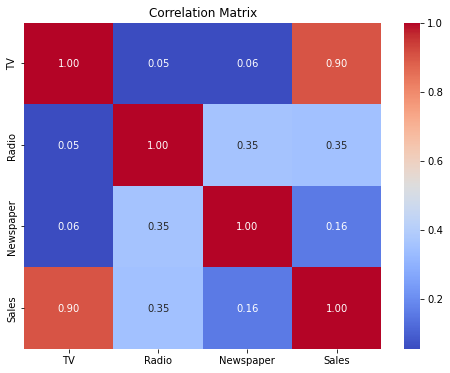

In [8]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 1**: There is a positive correlation between TV advertising and sales, while radio and newspaper spending showed weaker correlations. (Independence) </span>

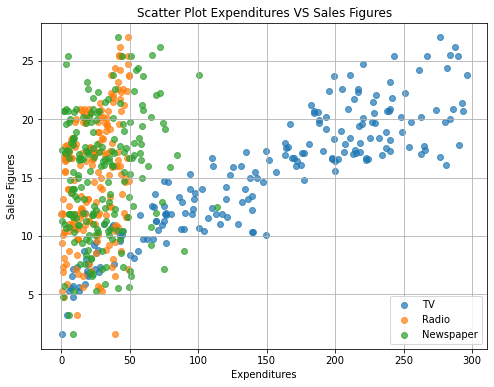

In [9]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Plot each column on the x-axis
plt.scatter(data['TV'], data['Sales'], label='TV', alpha=0.7)
plt.scatter(data['Radio'], data['Sales'], label='Radio', alpha=0.7)
plt.scatter(data['Newspaper'], data['Sales'], label='Newspaper', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot Expenditures VS Sales Figures')
plt.xlabel('Expenditures')
plt.ylabel('Sales Figures')
plt.legend()
plt.grid(True)
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 2**: You plotted advertising expenditure against sales. The scatter plot revealed a clear upward trend for TV, indicating that increased spending on TV ads correlated with higher sales revenue. (Linearity) </span>

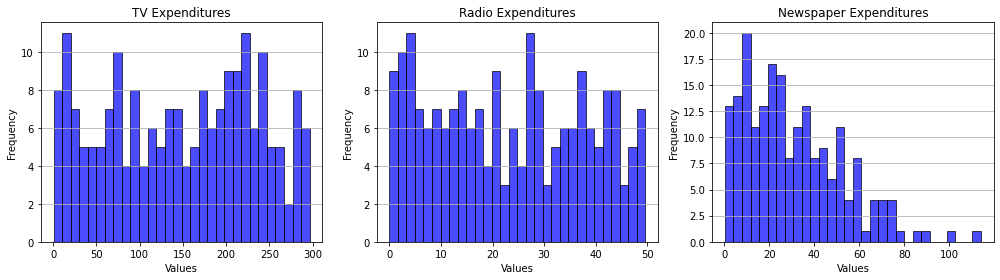

In [10]:
# Histogram
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(14,4))

for i, column in enumerate(columns_to_plot,1):
    plt.subplot(1,3,i)
    plt.hist(data[column], bins=30, alpha=0.7,color = 'blue', edgecolor='black')
    plt.title(f"{column} Expenditures")
    plt.xlabel('Values')
    plt.ylabel("Frequency")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

## 

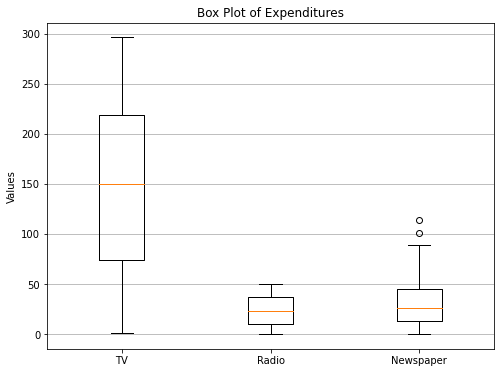

In [11]:
# Boxplot 
columns_to_plot = ['TV','Radio','Newspaper']
plt.figure(figsize=(8,6))

plt.boxplot([data[column] for column in columns_to_plot], labels=columns_to_plot)

plt.title('Box Plot of Expenditures')
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">The above results indicate that their might be presence of outliers in the Newspaper column. </span><br>

<span style="font-family: 'Courier New'; font-size: 18px;">Transform the Variable: You might consider applying a transformation to reduce skewness. Common transformations include:
- Log Transformation: Useful for positive values, it can help reduce skewness and handle outliers.
- Square Root Transformation: Also helpful for reducing skewness, especially for count data.
- Box-Cox Transformation: A more general method that can be applied to make data more normally distributed.</span>

In [12]:
print(data['Newspaper'].sort_values(ascending=True).tail())

118     79.2
165     84.8
75      89.4
101    100.9
16     114.0
Name: Newspaper, dtype: float64


In [13]:
print(data[data['Newspaper'] == 100.9])
print(data[data['Newspaper'] == 114])

        TV  Radio  Newspaper  Sales
101  296.4   36.3      100.9   23.8
      TV  Radio  Newspaper  Sales
16  67.8   36.6      114.0   12.5


<span style="font-family: 'Courier New'; font-size: 18px;">Based on this observations, you conclude that this 2 records are outlier and may be erros are as this are far away from Quertile 3 so we removed them. </span>

In [14]:
data = data[data['Newspaper'] != 114]
data = data[data['Newspaper'] != 100.9]

In [15]:
data.shape

(198, 4)

As we have now 198 rows where initially we have 200 rows this shows outliers have successfully removed. 

In [16]:
# Apply square root transformation to the 'Newspaper'
data['TransformedNewspaper'] = data['Newspaper'].apply(lambda x: x**0.5)

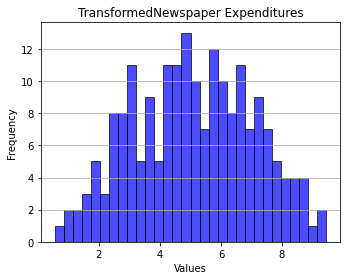

In [17]:
# Histogram
plt.figure(figsize=(14,4))

plt.subplot(1,3,i)
plt.hist(data['TransformedNewspaper'], bins=30, alpha=0.7,color = 'blue', edgecolor='black')
plt.title(f"{'TransformedNewspaper'} Expenditures")
plt.xlabel('Values')
plt.ylabel("Frequency")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

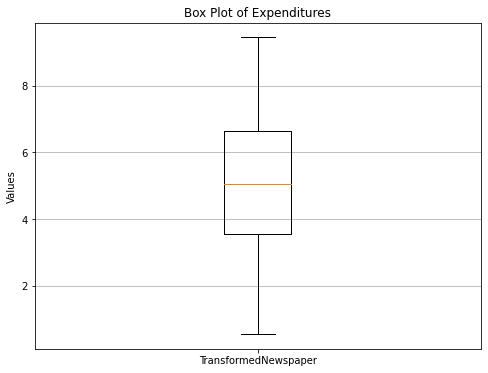

In [18]:
# Boxplot 
columns_to_plot = ['TransformedNewspaper']
plt.figure(figsize=(8,6))

plt.boxplot([data[column] for column in columns_to_plot], labels=columns_to_plot)

plt.title('Box Plot of Expenditures')
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()

From above plots we can conclude that, our all columns follows the normal distribution. 

In [19]:
# We drop the newspaper column as we have created a transformed column of it 
data = data.drop(columns = ['Newspaper'])

_________________________

## - Linear Regression
<span style="font-family: 'Courier New'; font-size: 18px;">Since data meets most of the necessary conditions for multiple linear regression, You and team can proceed confidently with the analysis. </span>

### - Performing Multiple Linear Regression

In [20]:
# Multiple Linear Regression over training Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data.drop(columns=['Sales'])
y = data[['Sales']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

model = LinearRegression()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)

In [21]:
mse = mean_squared_error(y_train,y_train_pred)
r2 = r2_score(y_train,y_train_pred)

In [73]:
# Extract the coefficients and intercept of the fitted model
coefficients = model.coef_  # coefficients for TV, TransformedNewspaper, Radio
intercept = model.intercept_  # intercept
# Print the coefficients
print(f'Intercept: {intercept}')
print(f"Coefficient's:  {coefficients[0]}")

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Intercept: [4.38942765]
Coefficient's:  [0.05395096 0.100862   0.09099095]
Mean Squared Error: 2.824025682566485
R^2 Score: 0.8976404680062006


### - Model Interpretation
<div class="alert alert-block alert-info">
<b><span style="font-family: 'Courier New'; font-size: 20px;">The Interpretation comes out as : Sales=4.389+0.053×TV+0.10×Radio+0.09×$\sqrt Newspaper$</b> </span>
</div> 

<div class="alert alert-block alert-light">
    <b>
        <span style="font-family: 'Arial'; font-size: 17px;">
            Which means:
        </span>
    </b>
    <ul style="font-family: 'Arial'; font-size: 20px;">
        <li>If no budget is allocated to any ads, sales are projected to be approximately &dollar;4.3M.</li>
        <li>For each additional &dollar;1,000 spent on TV advertising, sales increase by about 53,000 dollers.</li>
    </ul>
</div>

### - Actual Vs Predicted Sales visualization
#### Over a training dataset

In [51]:
# Ensure x_train, y_train, x_test, y_test, and y_pred are flattened arrays for plotting
x_train_flat = x_train.values.flatten() if isinstance(x_train, pd.DataFrame) else x_train
y_train_flat = y_train.values.flatten() if isinstance(y_train, pd.DataFrame) else y_train
x_test_flat = x_test.values.flatten() if isinstance(x_test, pd.DataFrame) else x_test
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test
y_train_pred_flat = y_train_pred.flatten()

In [74]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

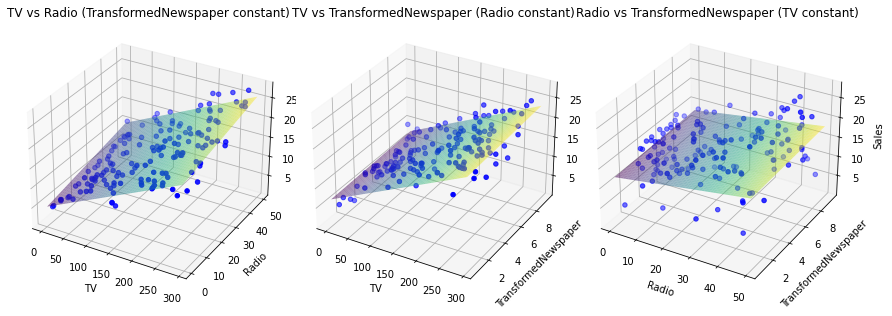

In [75]:
# Define a grid for plotting
x_grid_tv = np.linspace(x_train['TV'].min(), x_train['TV'].max(), 100)
x_grid_radio = np.linspace(x_train['Radio'].min(), x_train['Radio'].max(), 100)
x_grid_newspaper = np.linspace(x_train['TransformedNewspaper'].min(), x_train['TransformedNewspaper'].max(), 100)

# Create subplots with 3D axes
fig, axes = plt.subplots(1, 3, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Subplot 1: TV vs Radio (hold TransformedNewspaper constant)
x_mesh_tv, y_mesh_radio = np.meshgrid(x_grid_tv, x_grid_radio)
z_mesh_1 = intercept + coefficients[0, 0] * x_mesh_tv + coefficients[0, 1] * y_mesh_radio + coefficients[0, 2] * np.mean(x_train['TransformedNewspaper'])

axes[0].scatter(x_train['TV'], x_train['Radio'], y_train, color='blue', label='Data points')
axes[0].plot_surface(x_mesh_tv, y_mesh_radio, z_mesh_1, alpha=0.5, cmap='viridis')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Radio')
axes[0].set_zlabel('Sales')
axes[0].set_title('TV vs Radio (TransformedNewspaper constant)')

# Subplot 2: TV vs TransformedNewspaper (hold Radio constant)
x_mesh_tv, y_mesh_newspaper = np.meshgrid(x_grid_tv, x_grid_newspaper)
z_mesh_2 = intercept + coefficients[0, 0] * x_mesh_tv + coefficients[0, 1] * np.mean(x_train['Radio']) + coefficients[0, 2] * y_mesh_newspaper

axes[1].scatter(x_train['TV'], x_train['TransformedNewspaper'], y_train, color='blue', label='Data points')
axes[1].plot_surface(x_mesh_tv, y_mesh_newspaper, z_mesh_2, alpha=0.5, cmap='viridis')
axes[1].set_xlabel('TV')
axes[1].set_ylabel('TransformedNewspaper')
axes[1].set_zlabel('Sales')
axes[1].set_title('TV vs TransformedNewspaper (Radio constant)')

# Subplot 3: Radio vs TransformedNewspaper (hold TV constant)
x_mesh_radio, y_mesh_newspaper = np.meshgrid(x_grid_radio, x_grid_newspaper)
z_mesh_3 = intercept + coefficients[0, 0] * np.mean(x_train['TV']) + coefficients[0, 1] * x_mesh_radio + coefficients[0, 2] * y_mesh_newspaper

axes[2].scatter(x_train['Radio'], x_train['TransformedNewspaper'], y_train, color='blue', label='Data points')
axes[2].plot_surface(x_mesh_radio, y_mesh_newspaper, z_mesh_3, alpha=0.5, cmap='viridis')
axes[2].set_xlabel('Radio')
axes[2].set_ylabel('TransformedNewspaper')
axes[2].set_zlabel('Sales')
axes[2].set_title('Radio vs TransformedNewspaper (TV constant)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


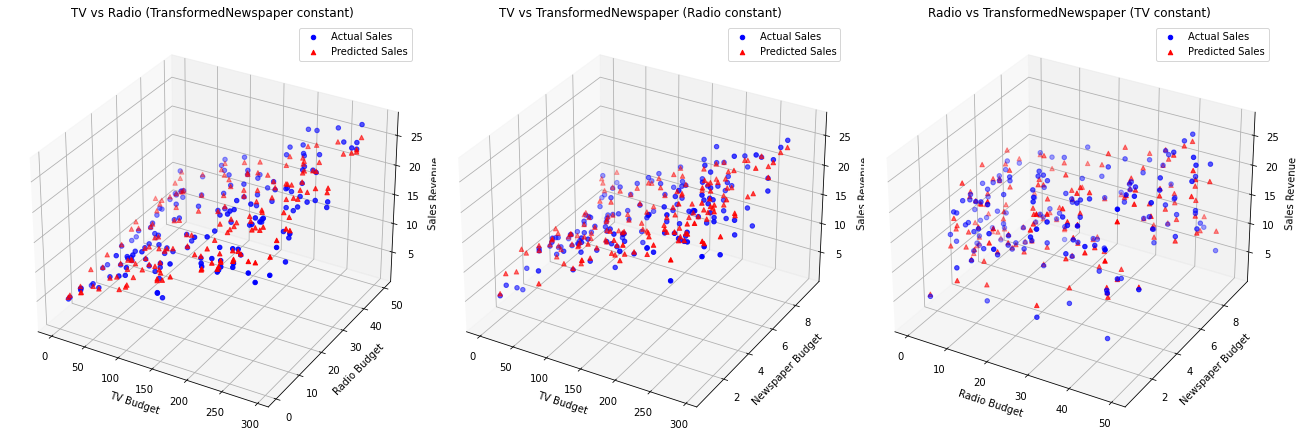

In [49]:
# Subplot grid: 1 row and 3 columns (for each combination)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Subplot 1: TV vs Radio (holding TransformedNewspaper constant)
ax1 = axes[0]
ax1.scatter(x_train['TV'], x_train['Radio'], y_train, color='blue', label='Actual Sales', marker='o')
ax1.scatter(x_train['TV'], x_train['Radio'], y_train_pred, color='red', label='Predicted Sales', marker='^')

ax1.set_xlabel('TV Budget')
ax1.set_ylabel('Radio Budget')
ax1.set_zlabel('Sales Revenue')
ax1.set_title('TV vs Radio (TransformedNewspaper constant)')
ax1.legend()

# Subplot 2: TV vs TransformedNewspaper (holding Radio constant)
ax2 = axes[1]
ax2.scatter(x_train['TV'], x_train['TransformedNewspaper'], y_train, color='blue', label='Actual Sales', marker='o')
ax2.scatter(x_train['TV'], x_train['TransformedNewspaper'], y_train_pred, color='red', label='Predicted Sales', marker='^')

ax2.set_xlabel('TV Budget')
ax2.set_ylabel('Newspaper Budget')
ax2.set_zlabel('Sales Revenue')
ax2.set_title('TV vs TransformedNewspaper (Radio constant)')
ax2.legend()

# Subplot 3: Radio vs TransformedNewspaper (holding TV constant)
ax3 = axes[2]
ax3.scatter(x_train['Radio'], x_train['TransformedNewspaper'], y_train, color='blue', label='Actual Sales', marker='o')
ax3.scatter(x_train['Radio'], x_train['TransformedNewspaper'], y_train_pred, color='red', label='Predicted Sales', marker='^')

ax3.set_xlabel('Radio Budget')
ax3.set_ylabel('Newspaper Budget')
ax3.set_zlabel('Sales Revenue')
ax3.set_title('Radio vs TransformedNewspaper (TV constant)')
ax3.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## - Residual Analysis

In [52]:
# Calculate residuals
res = np.array(y_train_flat - y_train_pred_flat, dtype=float)

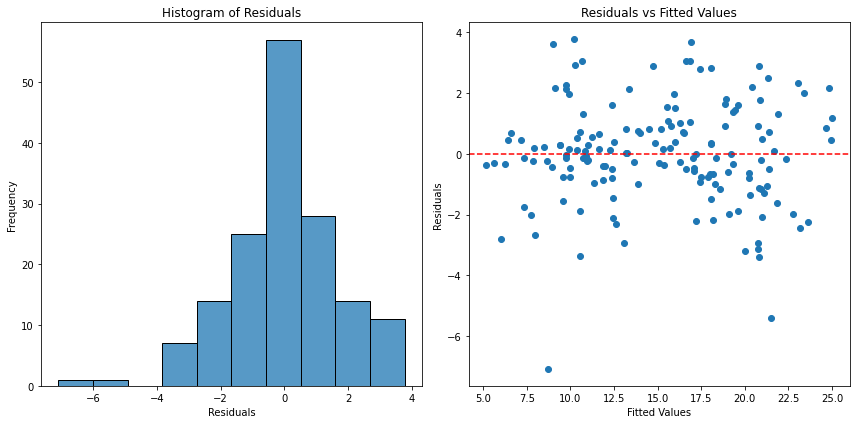

In [53]:
# Create a figure for residuals
plt.figure(figsize=(12, 6))

# Plot the histogram of residuals without KDE first
plt.subplot(1, 2, 1)
sns.histplot(res, bins=10)  
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Residuals vs Fitted values plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_flat, res)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 3**: The center of the normal distribution is around zero. The shape is also looks like a normal distribution. (Normality) </span>

In [54]:
print(x_train.shape)
print(res.shape)

(158, 3)
(158,)


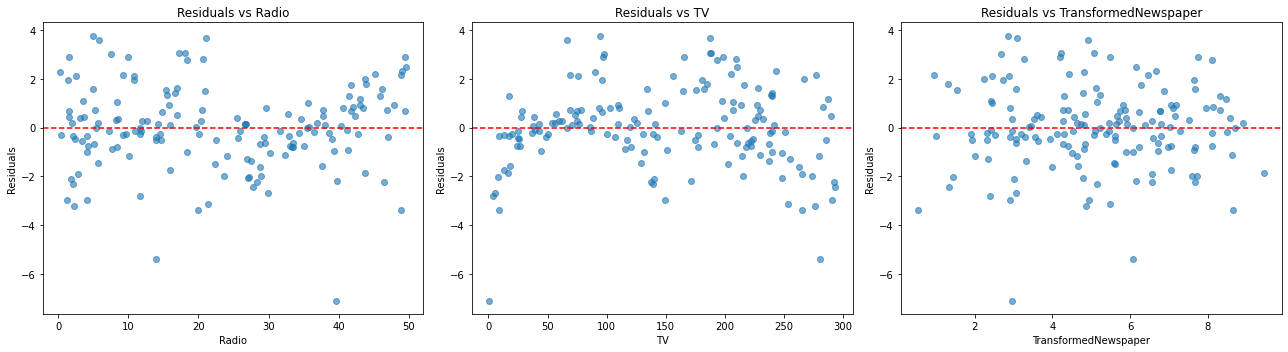

In [55]:
# Create subplots for each feature
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot residuals against each feature
features = ['Radio', 'TV', 'TransformedNewspaper']
for i, feature in enumerate(features):
    axs[i].scatter(x_train[feature], res, alpha=0.6)
    axs[i].axhline(y=0, color='red', linestyle='--')  # Line at 0 for reference
    axs[i].set_title(f'Residuals vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 4**: The residuals don't follow any patterns. So, the asssumptions of Simple Linear Regression are validated. (Homoscedasticity) </span>

### - Actual Vs Predicted Sales visualization
#### Over a testing dataset

In [77]:
y_pred = model.predict(x_test)
y_pred_flat = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred

In [78]:
# evaluate the model on the training and test set
print('The R-squared for the training set is', round(r2_score(y_true = y_train, y_pred = y_train_pred), 2))
print('The R-squared for the test set is', round(r2_score(y_true = y_test, y_pred = y_pred), 2))

The R-squared for the training set is 0.9
The R-squared for the test set is 0.91


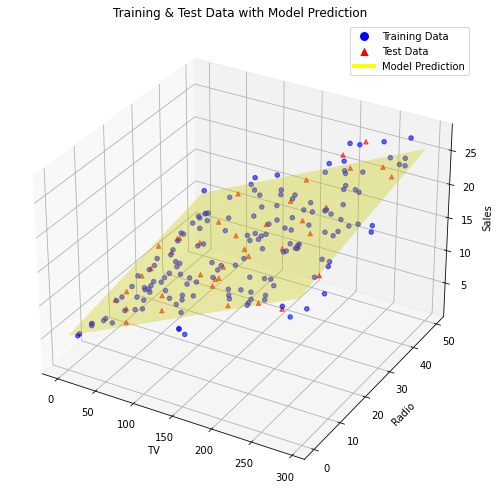

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Make predictions for the training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Create a 3D plot to visualize training and test data points along with the model's prediction
fig = plt.figure(figsize=(14, 7))

# Create subplots with 3D axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training data
ax.scatter(x_train['TV'], x_train['Radio'], y_train, color='blue', label='Training Data', alpha=0.6)

# Scatter plot for test data
ax.scatter(x_test['TV'], x_test['Radio'], y_test, marker='^', color='red', label='Test Data', alpha=0.6)

# Create a mesh grid for plotting the surface (for model's prediction)
x_grid_tv = np.linspace(x_train['TV'].min(), x_train['TV'].max(), 100)
x_grid_radio = np.linspace(x_train['Radio'].min(), x_train['Radio'].max(), 100)
x_mesh_tv, y_mesh_radio = np.meshgrid(x_grid_tv, x_grid_radio)

# Calculate the predicted values for the surface (using the mean of TransformedNewspaper)
z_mesh = intercept + coefficients[0, 0] * x_mesh_tv + coefficients[0, 1] * y_mesh_radio + coefficients[0, 2] * np.mean(x_train['TransformedNewspaper'])

# Plot the surface (model's prediction surface)
surf = ax.plot_surface(x_mesh_tv, y_mesh_radio, z_mesh, color='yellow', alpha=0.35)

# Create a proxy artist for the surface to add it to the legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Training Data'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=10, label='Test Data'),
    Line2D([0], [0], color='yellow', lw=4, label='Model Prediction')
]

# Labels and title
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Training & Test Data with Model Prediction')

# Add legend
ax.legend(handles=legend_elements)

# Show the plot
plt.tight_layout()
plt.show()


________________
_________________________

# Recommendations
<span style="font-family: 'Arial'; font-size: 20px;"> Based on our comprehensive analysis, DataByteSun recommended that RefreshCo increase its television advertising budget and a regression equation to optimum budget. We provided Saira with substantial data to support this recommendation, demonstrating a linear relationship between TV, Radio and Newspaper advertising and sales growth. </span>

__________________
_________________________

# Conclusion
<span style="font-family: 'Arial'; font-size: 18px;"> With data-driven insights in hand, Saira and her team felt empowered to adjust their advertising strategy. Following the implementation of your recommendations, RefreshCo experienced a significant uptick in sales over the following months. The partnership with DataByteSun flourished, leading to further successful collaborations in the competitive beverage market. </span>


<div class="alert alert-block alert-success">
<b>END</b>
</div>